['2022-11-09T033216_OB1_exp1_frame1_planet.fits', '2022-11-09T033216_OB1_exp1_frame2_planet.fits', '2022-11-09T033351_OB1_exp2_frame1_planet.fits', '2022-11-09T033351_OB1_exp2_frame2_planet.fits', '2022-11-09T033351_OB1_exp2_frame3_planet.fits', '2022-11-09T033351_OB1_exp2_frame4_planet.fits', '2022-11-09T033531_OB1_exp3_frame1_planet.fits', '2022-11-09T033531_OB1_exp3_frame2_planet.fits', '2022-11-09T033531_OB1_exp3_frame3_planet.fits', '2022-11-09T033531_OB1_exp3_frame4_planet.fits', '2022-11-09T033710_OB1_exp4_frame1_planet.fits', '2022-11-09T033710_OB1_exp4_frame2_planet.fits', '2022-11-09T033710_OB1_exp4_frame3_planet.fits', '2022-11-09T033710_OB1_exp4_frame4_planet.fits', '2022-11-09T033851_OB1_exp5_frame1_planet.fits', '2022-11-09T033851_OB1_exp5_frame2_planet.fits', '2022-11-09T033851_OB1_exp5_frame3_planet.fits', '2022-11-09T033851_OB1_exp5_frame4_planet.fits', '2022-11-09T033851_OB1_exp5_frame5_planet.fits', '2022-11-09T034029_OB1_exp6_frame1_planet.fits', '2022-11-09T034029_

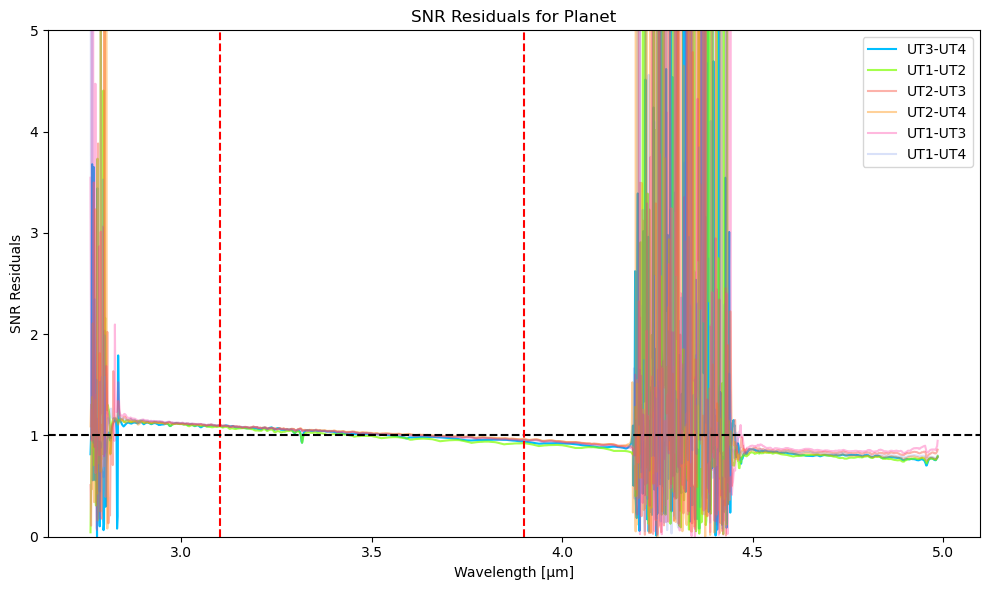

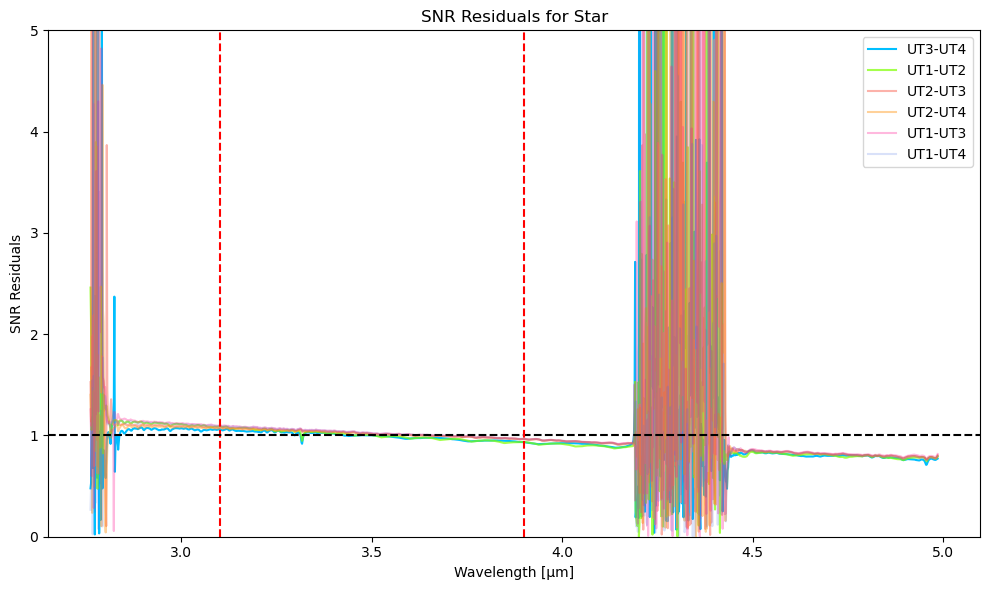

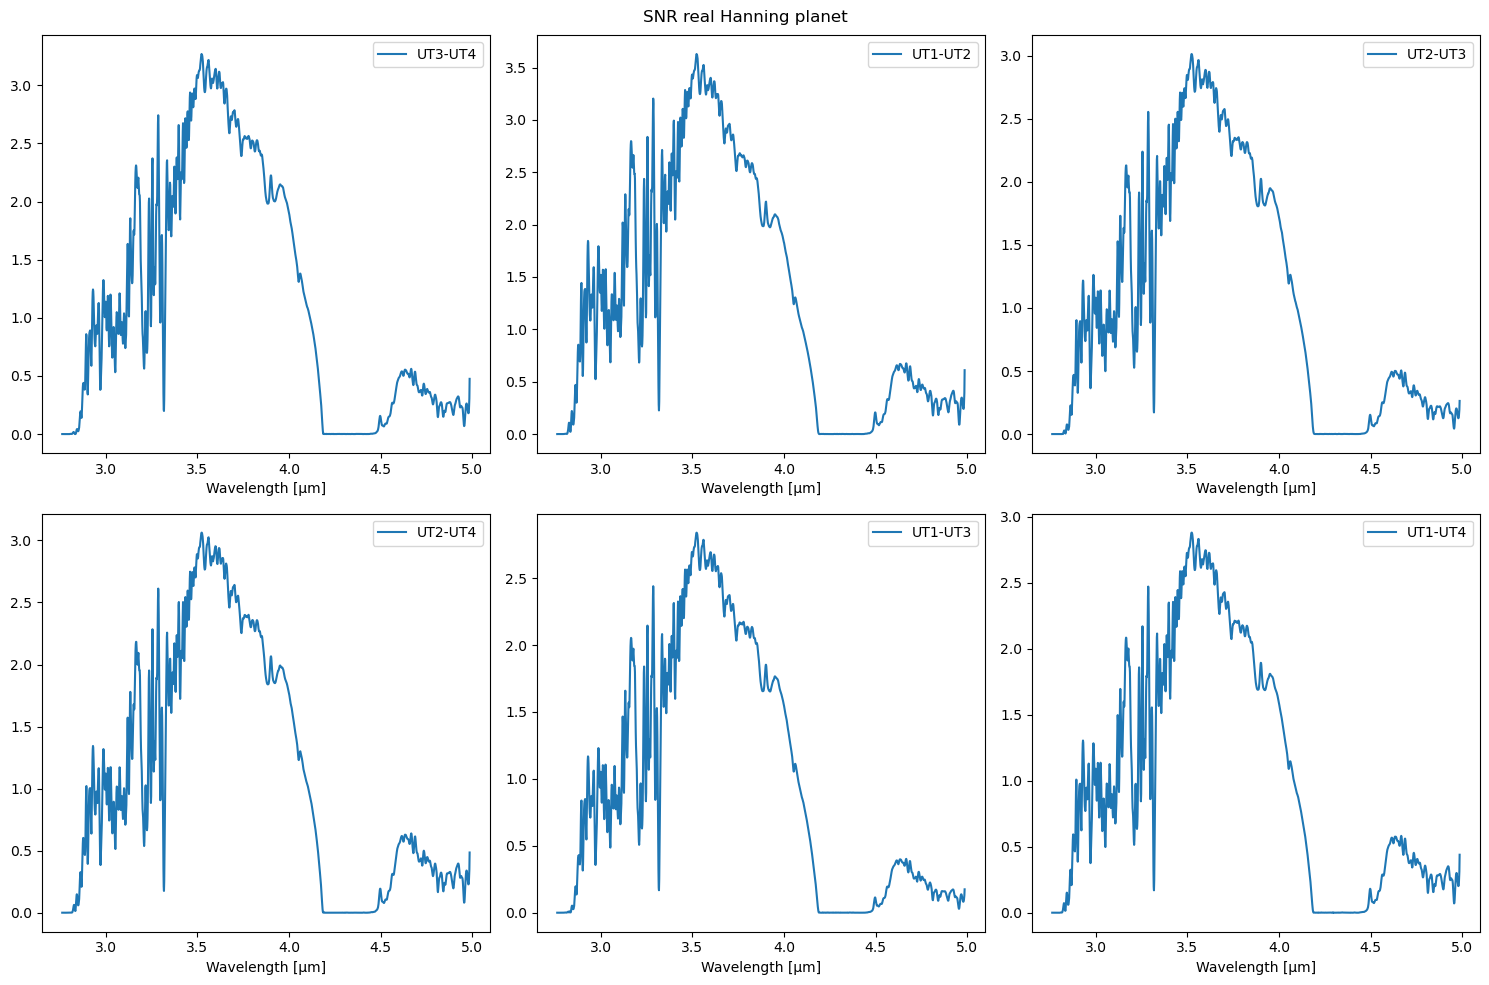

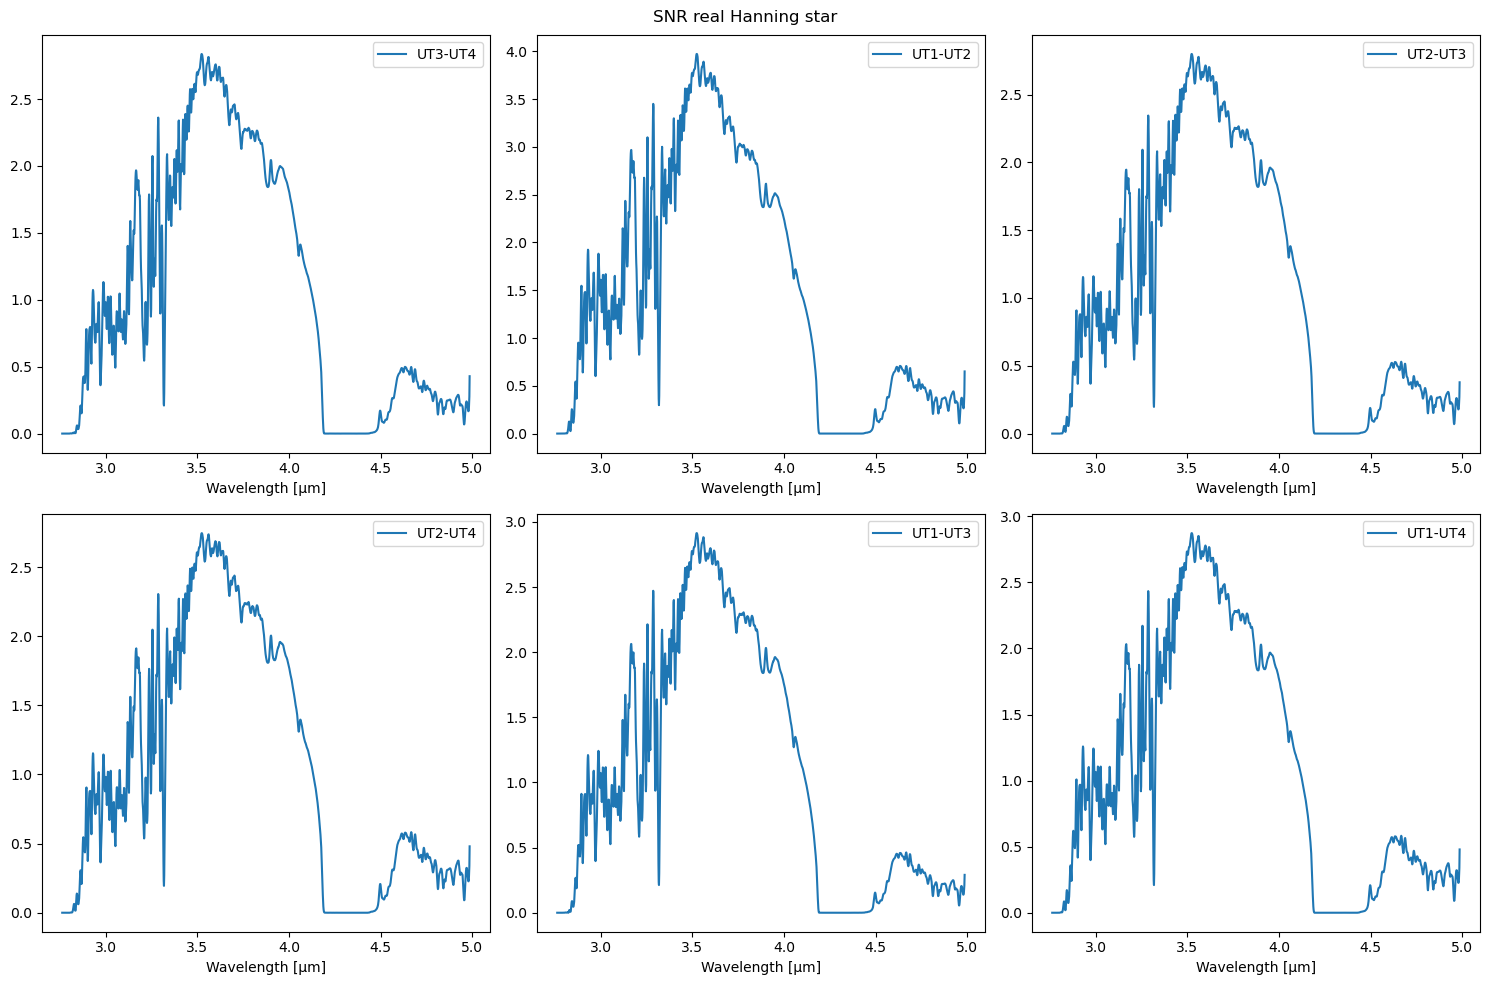

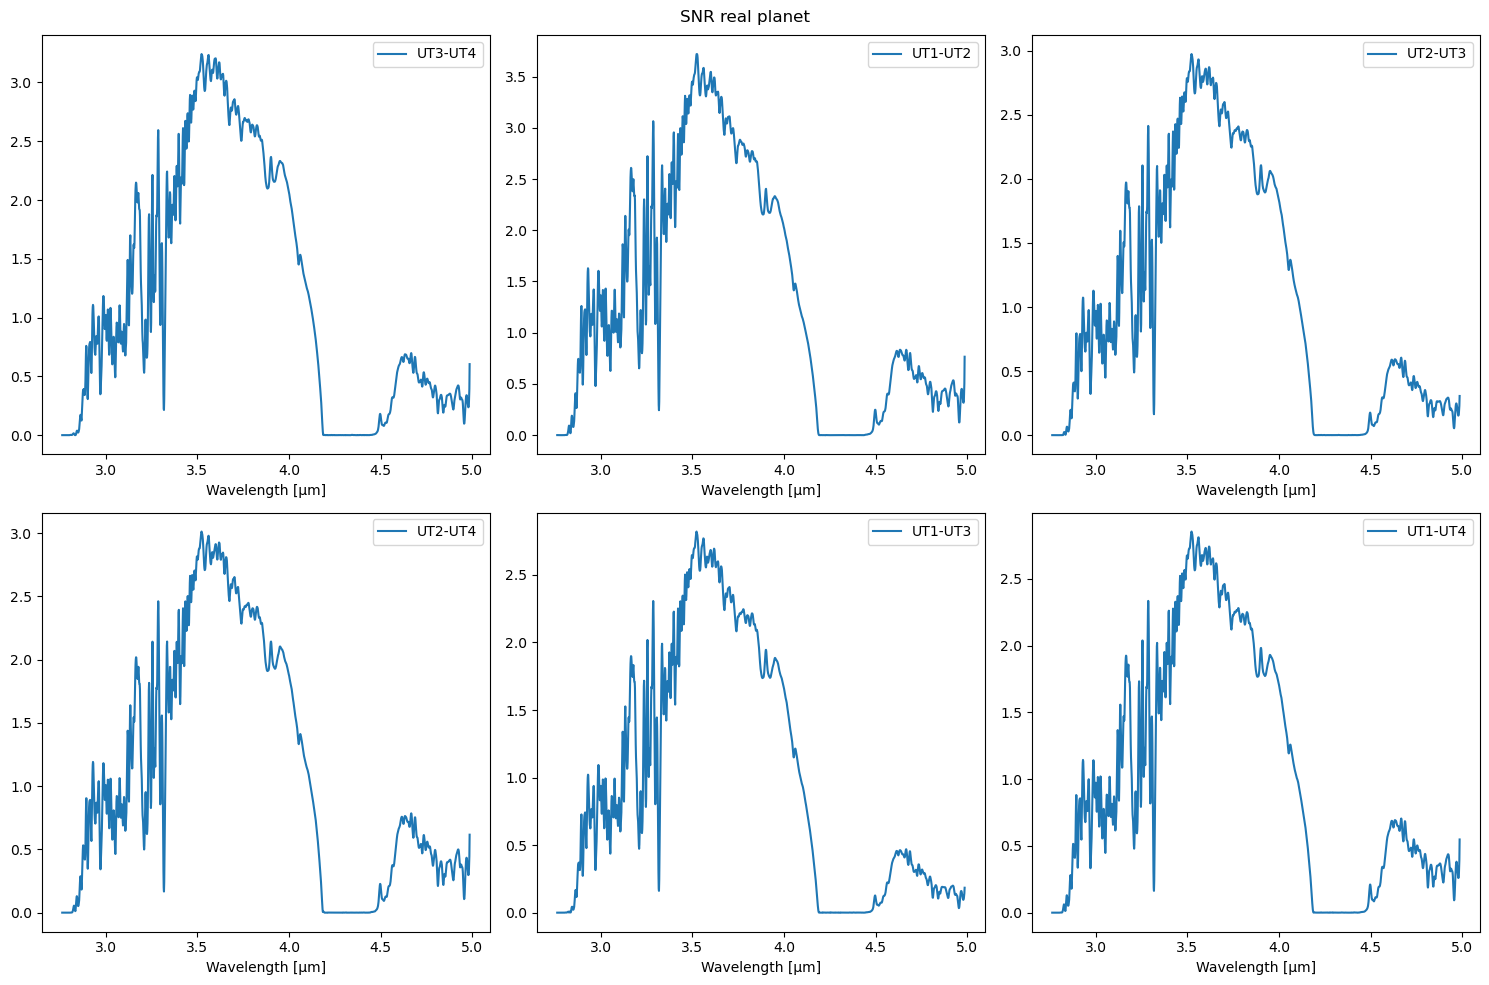

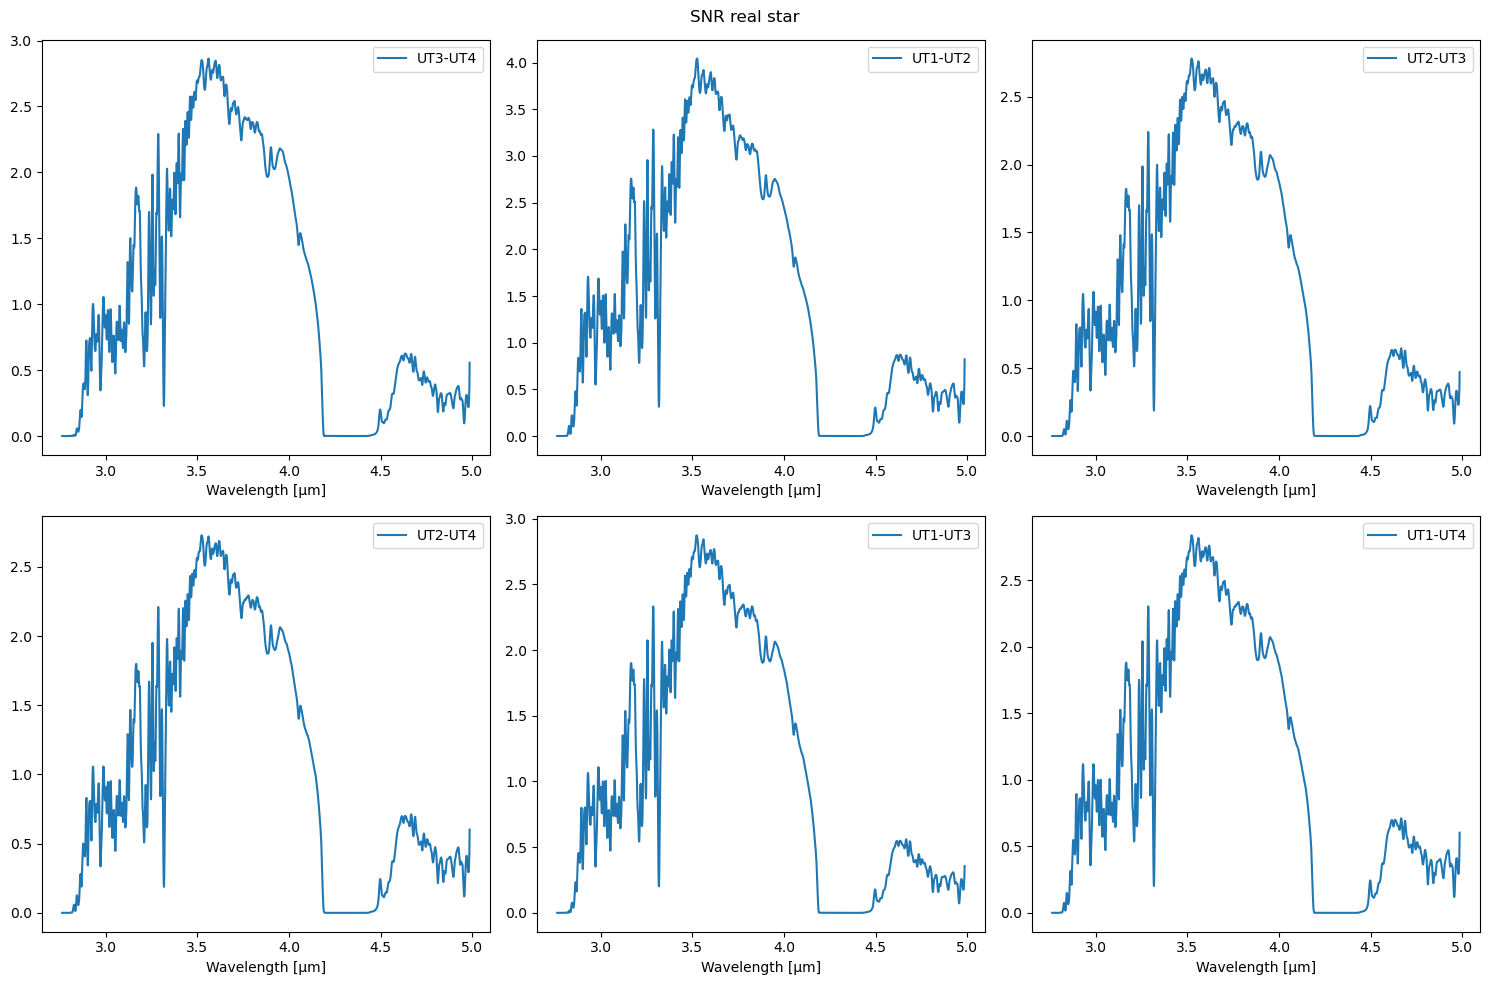

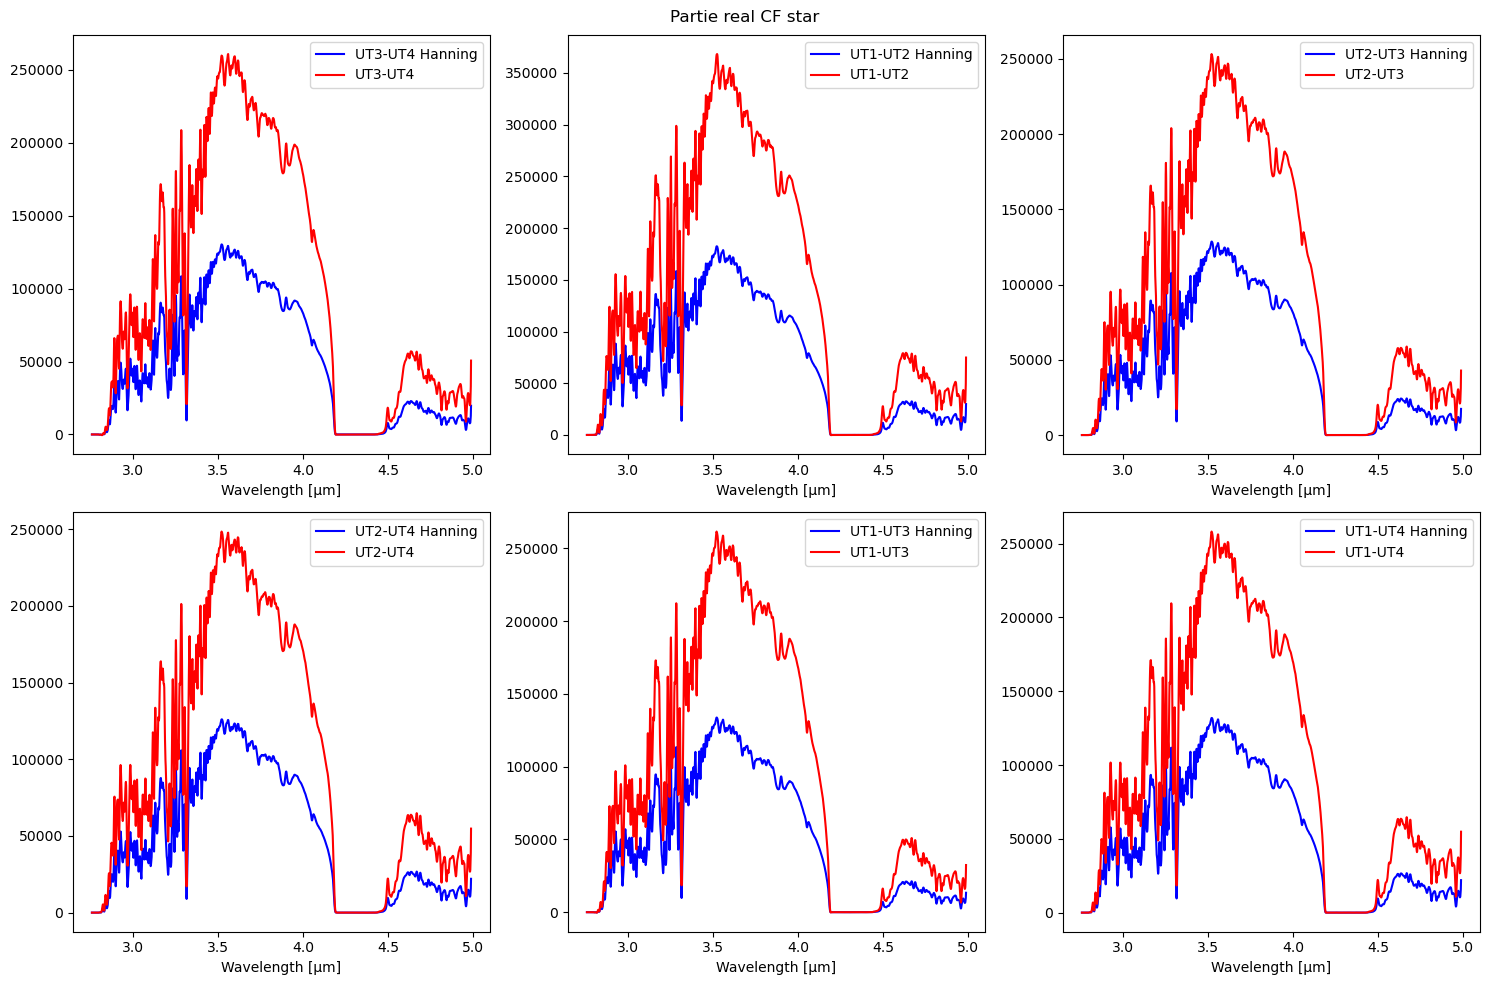

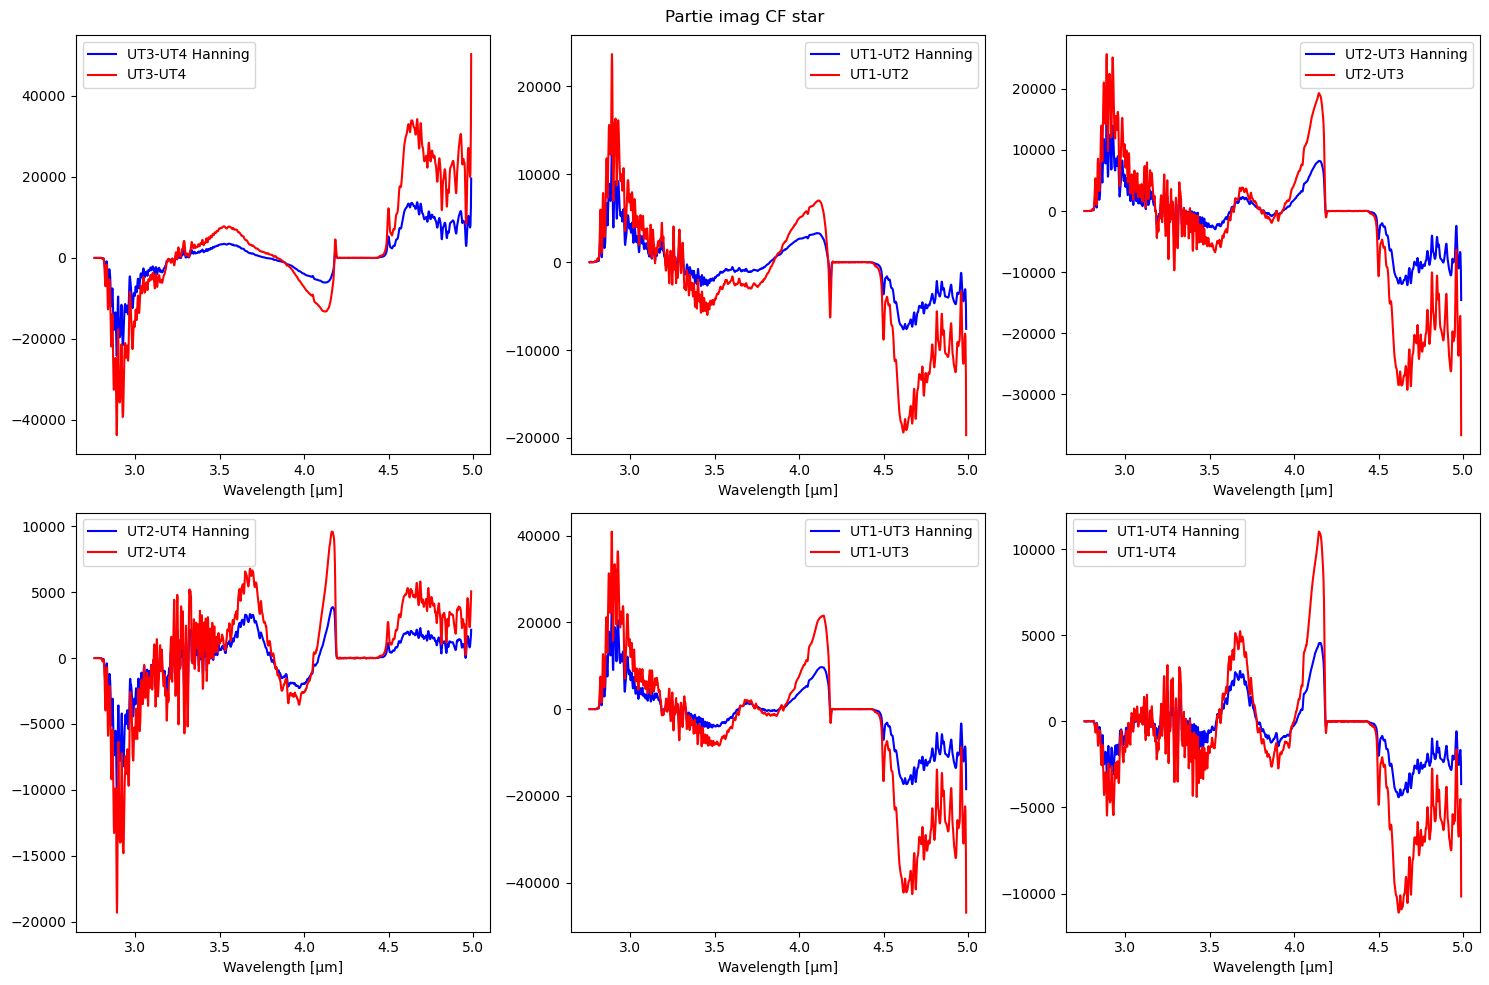

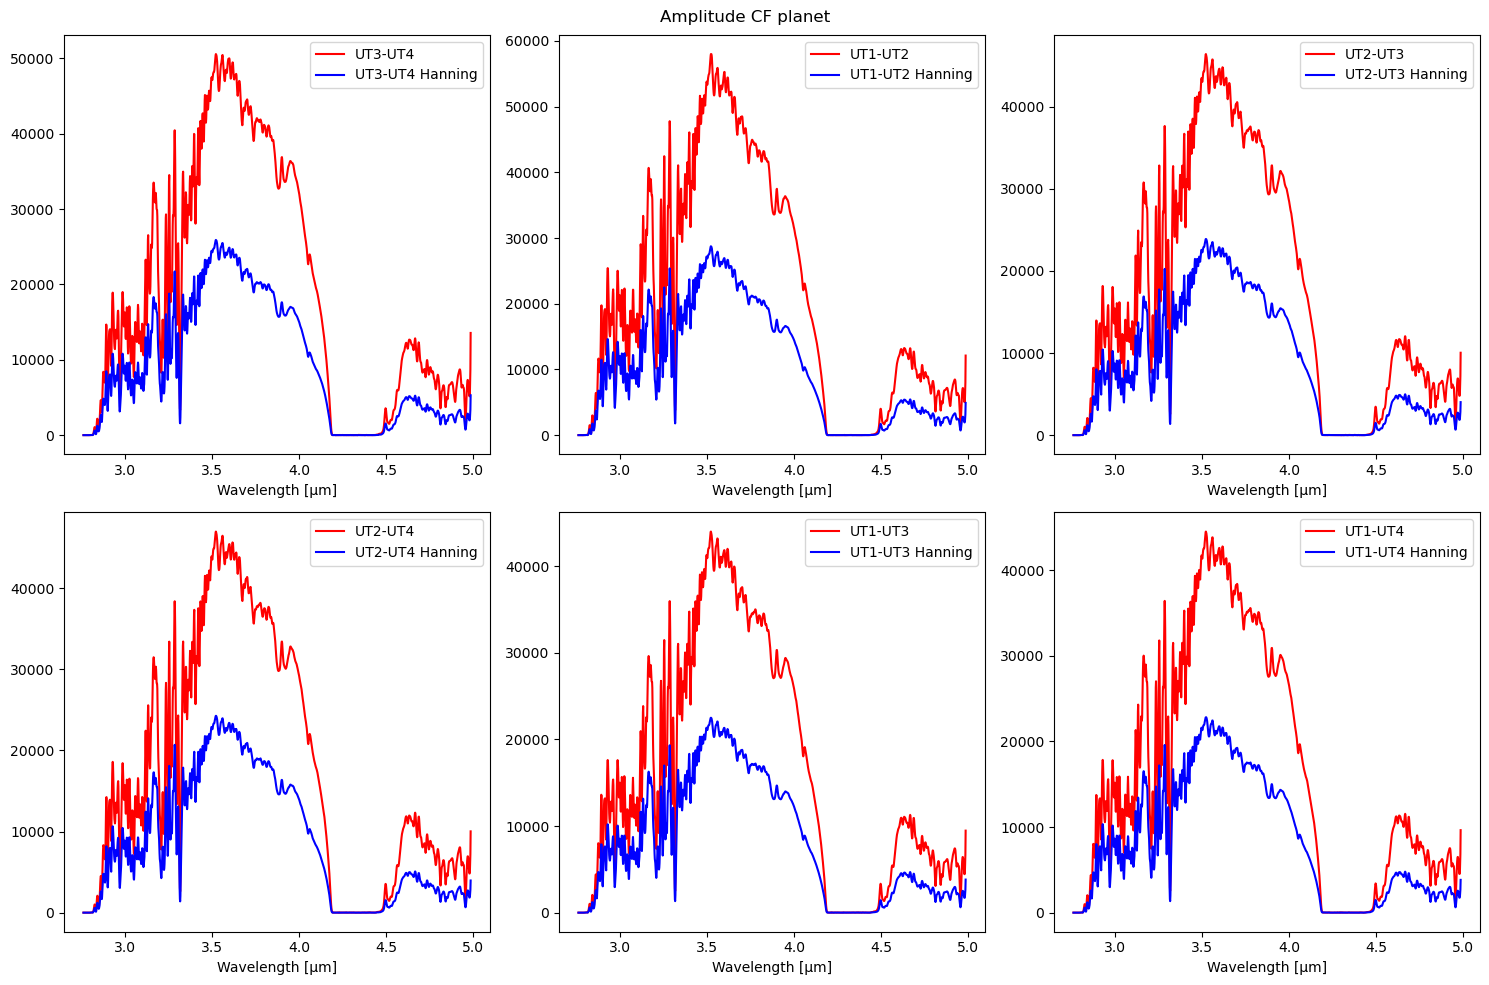

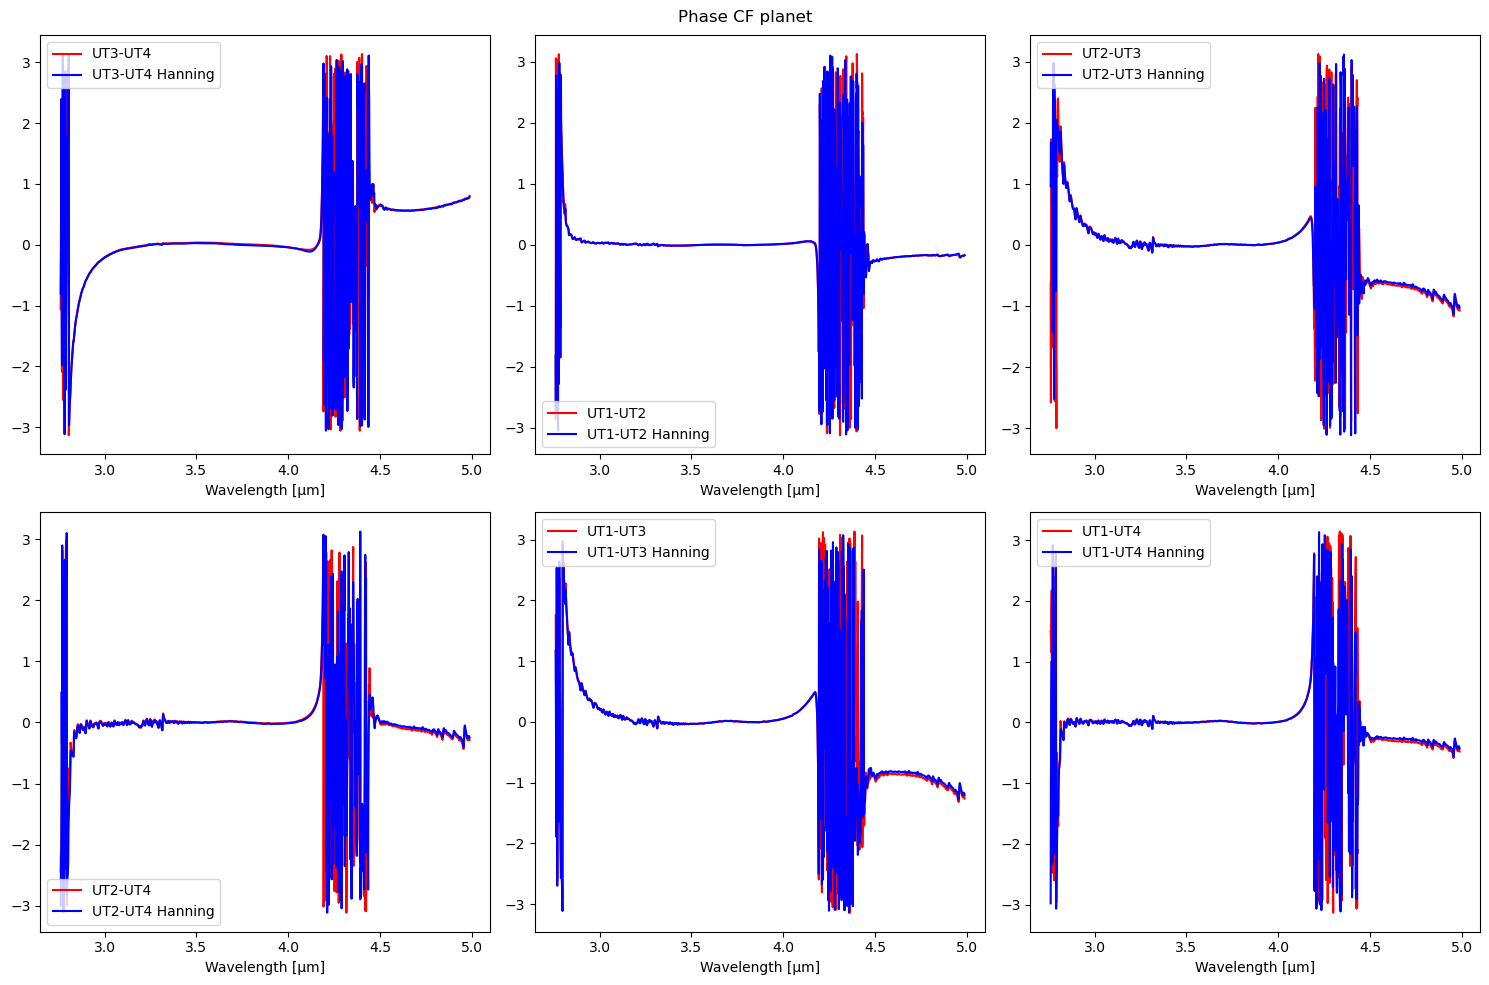

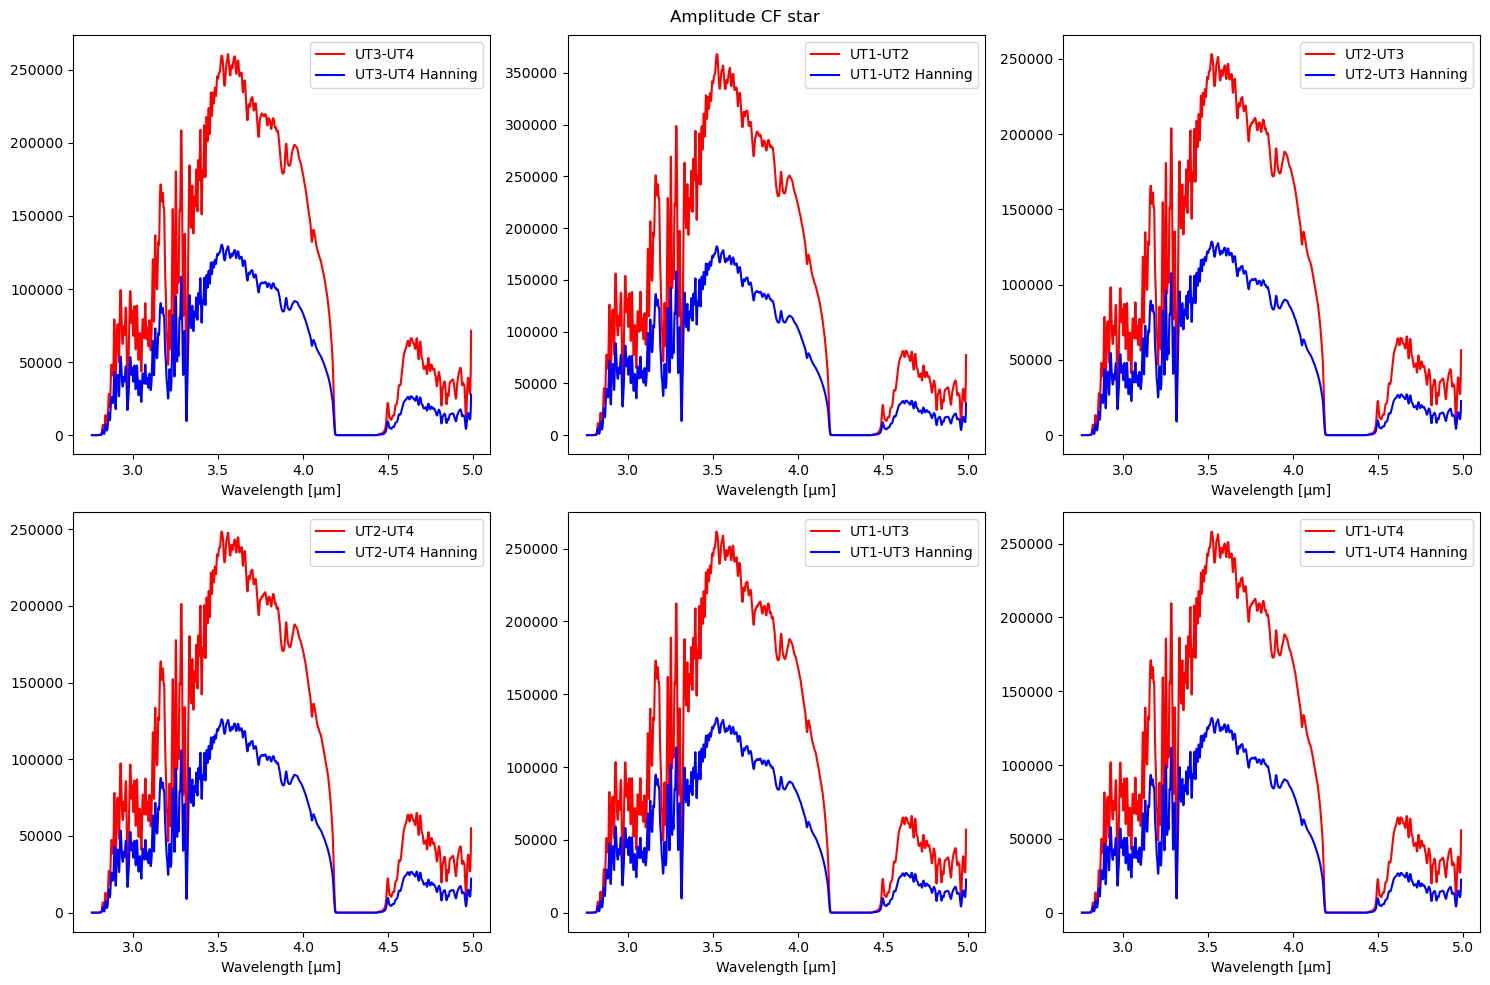

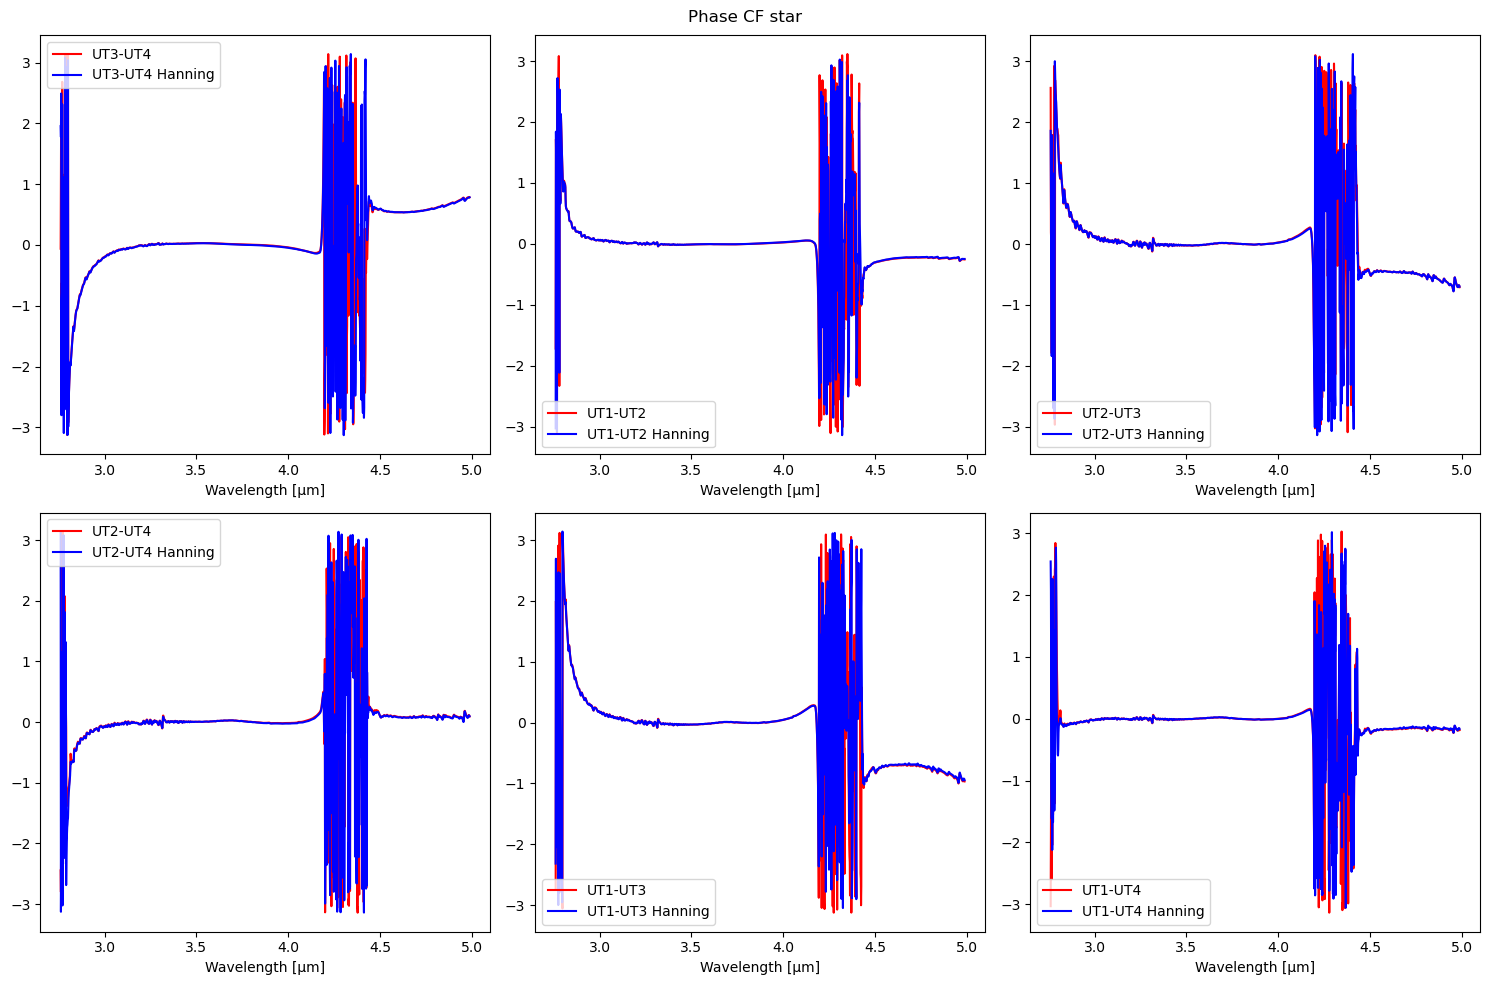

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
#Refaire tourner HR les deux pipelines
#Regarder frame par frame betaPicb et HR8799e


## HR 8799 e
# files = '/store/projects/MATISSE/jscigliuto/HR8799e/HR8799e_normal_2023-10-31/'
# files_Han = '/store/projects/MATISSE/jscigliuto/HR8799e/HR8799e_Hanningshifted30_2023-10-31_2/Frame_iter4/corrected_data/'

## beta Pic b
files = '/store/projects/MATISSE/jscigliuto/betaPicb/betapicb_pipeline_normal/corrPhase_4/'
files_Han = '/store/projects/MATISSE/jscigliuto/betaPicb/betapicb_Hanning15shifted_2022-11-08/corrPhase_4/'
## beta Pic b binned data
# files_Han = '/store/projects/MATISSE/jscigliuto/betaPicb/betapicb_Hanning30shifted3_2022-11-08/corrPhase_4/corrected_data_bin5/'
# files = '/store/projects/MATISSE/jscigliuto/betaPicb/betapicb_pipeline_normal/corrPhase_4/corrected_data_bin5/'

baselines_order = ['UT3-UT4', 'UT1-UT2', 'UT2-UT3', 'UT2-UT4', 'UT1-UT3', 'UT1-UT4']

def compare_snr(path, path_Han, filelist):
    n_files = len(filelist)
    for i_file, file in enumerate(filelist):
        hdul = fits.open(path + file)
        hdul_Han = fits.open(path_Han + file)
        if i_file == 0:
            #Initialization
            n_wave = hdul['OI_WAVELENGTH'].data['EFF_WAVE'].size
            visamp = np.zeros((n_files, 6, n_wave))
            visamp_err = np.zeros((n_files, 6, n_wave))
            visamp_Han = np.zeros((n_files, 6, n_wave))
            visamp_err_Han = np.zeros((n_files, 6, n_wave))

        visamp[i_file] = hdul['OI_VIS'].data['VISAMP']
        visamp_err[i_file] = hdul['OI_VIS'].data['VISAMPERR']
        visamp_Han[i_file] = hdul_Han['OI_VIS'].data['VISAMP']
        visamp_err_Han[i_file] = hdul_Han['OI_VIS'].data['VISAMPERR']
        hdul.close() ; hdul_Han.close()

    #Average visamp over all files
    visamp = np.mean(visamp, axis=0)
    visamp_Han = np.mean(visamp_Han, axis=0)
    visamp_err = np.mean(visamp_err, axis=0)
    visamp_err_Han = np.mean(visamp_err_Han, axis=0)

    #Compute the SNR
    snr = visamp/visamp_err
    snr_Han = visamp_Han/visamp_err_Han

    #Average over all files
    # snr = np.mean(snr, axis=0)
    # snr_Han = np.mean(snr_Han, axis=0)

    return snr, snr_Han


def compare_snr_cf(path, path_Han, filelist):
    n_files = len(filelist)
    print(n_files)
    for i_file, file in enumerate(filelist):
        hdul = fits.open(path + file)
        hdul_Han = fits.open(path_Han + file)
        if i_file == 0:
            #Initialization
            n_wave = hdul['OI_WAVELENGTH'].data['EFF_WAVE'].size
            visamp = np.zeros((n_files, 6, n_wave))
            visamp_err = np.zeros((n_files, 6, n_wave))
            visamp_Han = np.zeros((n_files, 6, n_wave))
            visamp_err_Han = np.zeros((n_files, 6, n_wave))
            visphi = np.zeros((n_files, 6, n_wave))
            visphi_err = np.zeros((n_files, 6, n_wave))
            visphi_Han = np.zeros((n_files, 6, n_wave))
            visphi_err_Han = np.zeros((n_files, 6, n_wave))

        visamp[i_file] = hdul['OI_VIS'].data['VISAMP']
        visamp_err[i_file] = hdul['OI_VIS'].data['VISAMPERR']
        visphi[i_file] = hdul['OI_VIS'].data['VISPHI']
        visphi_err[i_file] = hdul['OI_VIS'].data['VISPHIERR']

        visamp_Han[i_file] = hdul_Han['OI_VIS'].data['VISAMP']
        visamp_err_Han[i_file] = hdul_Han['OI_VIS'].data['VISAMPERR']
        visphi_Han[i_file] = hdul_Han['OI_VIS'].data['VISPHI']
        visphi_err_Han[i_file] = hdul_Han['OI_VIS'].data['VISPHIERR']

        hdul.close() ; hdul_Han.close()
    
    #Average visamp over all files
    visamp = np.mean(visamp, axis=0)
    visamp_Han = np.mean(visamp_Han, axis=0)
    visamp_err = np.mean(visamp_err, axis=0)
    visamp_err_Han = np.mean(visamp_err_Han, axis=0)
    visphi = np.mean(visphi, axis=0)
    visphi_Han = np.mean(visphi_Han, axis=0)
    visphi_err = np.mean(visphi_err, axis=0)
    visphi_err_Han = np.mean(visphi_err_Han, axis=0)


    #Compute the CFs and associated errors
    # cf = visamp * np.exp(1j * visphi * (np.pi/180))
    cf_real = visamp * np.cos(visphi * (np.pi/180))
    cf_imag = visamp * np.sin(visphi * (np.pi/180))
    cf = cf_real + 1j * cf_imag

    # cf_Han = visamp_Han * np.exp(1j * visphi_Han * (np.pi/180))
    cf_real_Han = visamp_Han * np.cos(visphi_Han * (np.pi/180))
    cf_imag_Han = visamp_Han * np.sin(visphi_Han * (np.pi/180))
    cf_Han = cf_real_Han + 1j * cf_imag_Han

    #Propogation incertidude sig**2 = (df/dx)**2 dx**2
    cf_real_err = np.sqrt(((np.cos(visphi * (np.pi/180)))**2) * visamp_err**2 + ((visamp * np.sin(visphi * (np.pi/180)))**2) * visphi_err**2)
    cf_imag_err = np.sqrt(((np.sin(visphi * (np.pi/180)))**2) * visamp_err**2 + ((visamp * np.cos(visphi * (np.pi/180)))**2) * visphi_err**2)

    cf_real_err_Han = np.sqrt(((np.cos(visphi_Han * (np.pi/180)))**2) * visamp_err_Han**2 + ((visamp_Han * np.sin(visphi_Han * (np.pi/180)))**2) * visphi_err_Han**2)
    cf_imag_err_Han = np.sqrt(((np.sin(visphi_Han * (np.pi/180)))**2) * visamp_err_Han**2 + ((visamp_Han * np.cos(visphi_Han * (np.pi/180)))**2) * visphi_err_Han**2)

    '''
    cf_real_errsquared = np.sqrt(2) * cf_real_err * cf_real
    cf_imag_errsquared = np.sqrt(2) * cf_imag_err * cf_imag
    cf_real_errsquared_Han = np.sqrt(2) * cf_real_err_Han * cf_real_Han
    cf_imag_errsquared_Han = np.sqrt(2) * cf_imag_err_Han * cf_imag_Han

    cf_tot_errsquared = np.sqrt(cf_real_errsquared**2+cf_imag_errsquared**2)
    cf_tot_errsquared_Han = np.sqrt(cf_real_errsquared_Han**2+cf_imag_errsquared_Han**2)

    cf_tot_err = cf_tot_errsquared / np.sqrt(2) / np.sqrt(cf_real**2+cf_imag**2)
    cf_tot_err_Han = cf_tot_errsquared_Han / np.sqrt(2) / np.sqrt(cf_real_Han**2+cf_imag_Han**2)

    # cf_tot_err = np.sqrt(np.sum(cf_tot_err**2, axis=0))/len(cf_tot_err)
    # cf_tot_err_Han = np.sqrt(np.sum(cf_tot_err_Han**2, axis=0))/len(cf_tot_err_Han)

    cf_tot_err = np.sqrt(cf_tot_err**2)
    cf_tot_err_Han = np.sqrt(cf_tot_err_Han**2)
    '''

    #Compute the SNR
    snr = np.sqrt((cf_real**2+cf_imag**2) / (cf_real_err**2 + cf_imag_err**2))
    snr_Han = np.sqrt((cf_real_Han**2+cf_imag_Han**2) / (cf_real_err_Han**2 + cf_imag_err_Han**2)) 

    #Tattuli et al. 2007
    # snr = np.sqrt((cf_real**2/cf_real_err**2)-1 + (cf_imag**2/cf_imag_err**2)-1)
    # snr_Han = np.sqrt((cf_real_Han**2/cf_real_err_Han**2)-1 + (cf_imag_Han**2/cf_imag_err_Han**2)-1)

    return snr, snr_Han, cf_real, cf_imag, cf_real_err, cf_imag_err, cf_real_Han, cf_imag_Han, cf_real_err_Han, cf_imag_err_Han



def compare_snr_cf_real_imag(path, path_Han, filelist):
    n_files = len(filelist)
    print(n_files)
    for i_file, file in enumerate(filelist):
        hdul = fits.open(path + file)
        hdul_Han = fits.open(path_Han + file)
        if i_file == 0:
            #Initialization
            n_wave = hdul['OI_WAVELENGTH'].data['EFF_WAVE'].size
            visamp = np.zeros((n_files, 6, n_wave))
            visamp_err = np.zeros((n_files, 6, n_wave))
            visamp_Han = np.zeros((n_files, 6, n_wave))
            visamp_err_Han = np.zeros((n_files, 6, n_wave))
            visphi = np.zeros((n_files, 6, n_wave))
            visphi_err = np.zeros((n_files, 6, n_wave))
            visphi_Han = np.zeros((n_files, 6, n_wave))
            visphi_err_Han = np.zeros((n_files, 6, n_wave))

        visamp[i_file] = hdul['OI_VIS'].data['VISAMP']
        visamp_err[i_file] = hdul['OI_VIS'].data['VISAMPERR']
        visphi[i_file] = hdul['OI_VIS'].data['VISPHI']
        visphi_err[i_file] = hdul['OI_VIS'].data['VISPHIERR']

        visamp_Han[i_file] = hdul_Han['OI_VIS'].data['VISAMP']
        visamp_err_Han[i_file] = hdul_Han['OI_VIS'].data['VISAMPERR']
        visphi_Han[i_file] = hdul_Han['OI_VIS'].data['VISPHI']
        visphi_err_Han[i_file] = hdul_Han['OI_VIS'].data['VISPHIERR']

        hdul.close() ; hdul_Han.close()
    
    cf = visamp * np.exp(1j * visphi * (np.pi/180))
    cf_Han = visamp_Han * np.exp(1j * visphi_Han * (np.pi/180))
 
    #Averaging the cf
    cf_real = np.mean(np.real(cf), axis=0)
    cf_imag = np.mean(np.imag(cf), axis=0)
    cf_real_err = np.std(cf_real)
    cf_imag_err = np.std(cf_imag)

    cf_real_Han = np.mean(np.real(cf_Han), axis=0)
    cf_imag_Han = np.mean(np.imag(cf_Han), axis=0)
    cf_real_Han = np.nan_to_num(cf_real_Han)
    cf_imag_Han = np.nan_to_num(cf_imag_Han)
    cf_real_err_Han = np.std(cf_real_Han)
    cf_imag_err_Han = np.std(cf_imag_Han)

    print(cf_real_Han, cf_imag_Han)

    # cf_real_err = np.sqrt(((np.cos(visphi * (np.pi/180)))**2) * visamp_err**2 + ((visamp * np.sin(visphi * (np.pi/180)))**2) * visphi_err**2)
    # cf_imag_err = np.sqrt(((np.sin(visphi * (np.pi/180)))**2) * visamp_err**2 + ((visamp * np.cos(visphi * (np.pi/180)))**2) * visphi_err**2)

    # cf_real_err_Han = np.sqrt(((np.cos(visphi_Han * (np.pi/180)))**2) * visamp_err_Han**2 + ((visamp_Han * np.sin(visphi_Han * (np.pi/180)))**2) * visphi_err_Han**2)
    # cf_imag_err_Han = np.sqrt(((np.sin(visphi_Han * (np.pi/180)))**2) * visamp_err_Han**2 + ((visamp_Han * np.cos(visphi_Han * (np.pi/180)))**2) * visphi_err_Han**2)
   
    # cf_real_err = np.mean(cf_real_err, axis=0)
    # cf_imag_err = np.mean(cf_imag_err, axis=0)
    # cf_real_err_Han = np.mean(cf_real_err_Han, axis=0)
    # cf_imag_err_Han = np.mean(cf_imag_err_Han, axis=0)

    #SNR
    snr_real = np.sqrt((cf_real**2) / (cf_real_err**2))#*np.sqrt(n_files)
    snr_imag = np.sqrt((cf_imag**2) / (cf_imag_err**2))#*np.sqrt(n_files)
    snr_Han_real = np.sqrt((cf_real_Han**2) / (cf_real_err_Han**2))#*np.sqrt(n_files)
    snr_Han_imag = np.sqrt((cf_imag_Han**2) / (cf_imag_err_Han**2))#*np.sqrt(n_files)

    return snr_real, snr_imag, snr_Han_real, snr_Han_imag, cf_real, cf_imag, cf_real_err, cf_imag_err, cf_real_Han, cf_imag_Han, cf_real_err_Han, cf_imag_err_Han


def compare_cf(path, path_Han, filelist):
    n_files = len(filelist)
    for i_file, file in enumerate(filelist):
        hdul = fits.open(path + file)
        hdul_Han = fits.open(path_Han + file)
        if i_file == 0:
            #Initialization
            n_wave = hdul['OI_WAVELENGTH'].data['EFF_WAVE'].size
            visamp = np.zeros((n_files, 6, n_wave))
            visphi = np.zeros((n_files, 6, n_wave))
            visamp_Han = np.zeros((n_files, 6, n_wave))
            visphi_Han = np.zeros((n_files, 6, n_wave))

        visamp[i_file] = hdul['OI_VIS'].data['VISAMP']
        visphi[i_file] = hdul['OI_VIS'].data['VISPHI']
        visamp_Han[i_file] = hdul_Han['OI_VIS'].data['VISAMP']
        visphi_Han[i_file] = hdul_Han['OI_VIS'].data['VISPHI']
        hdul.close() ; hdul_Han.close()

    visamp_mean = np.mean(visamp, axis=0)
    visphi_mean = np.mean(visphi, axis=0)

    visamp_Han_mean = np.mean(visamp_Han, axis=0)
    visphi_Han_mean = np.mean(visphi_Han, axis=0)

    #Compute the CF
    cf = visamp_mean * np.exp(1j * visphi_mean * (np.pi/180))
    cf_Han = visamp_Han_mean * np.exp(1j * visphi_Han_mean * (np.pi/180))

    #Average over all files
    # cf = np.mean(cf, axis=0)
    # cf_Han = np.mean(cf_Han, axis=0)

    return cf, cf_Han

fileslist_star = sorted([file for file in os.listdir(files) if 'star' in file])
fileslist_planet = sorted([file for file in os.listdir(files) if 'planet' in file and not 'antiplanet' in file]) #enlever l'antiplanet
print(fileslist_planet) ; print(fileslist_star)

# snr_star, snr_star_Han = compare_snr(files, files_Han, fileslist_star)
# snr_planet, snr_planet_Han = compare_snr(files, files_Han, fileslist_planet)

# snr_star, snr_star_Han, cf_real_star_err, cf_imag_star_err, cf_real_star_err_Han, cf_imag_star_err_Han = compare_snr_cf(files, files_Han, fileslist_star)
# snr_planet, snr_planet_Han, cf_real_planet_err, cf_imag_planet_err, cf_real_planet_err_Han, cf_imag_planet_err_Han = compare_snr_cf(files, files_Han, fileslist_planet)

snr_real_star, snr_imag_star, snr_Han_real_star, snr_Han_imag_star, cf_real_star, cf_imag_star, cf_real_star_err, cf_imag_star_err, cf_real_Han_star, cf_imag_Han_star, cf_real_star_err_Han, cf_imag_star_err_Han = compare_snr_cf_real_imag(files, files_Han, fileslist_star)
snr_real_planet, snr_imag_planet, snr_Han_real_planet, snr_Han_imag_planet, cf_real_planet, cf_imag_planet, cf_real_planet_err, cf_imag_planet_err, cf_real_Han_planet, cf_imag_Han_planet, cf_real_planet_err_Han, cf_imag_planet_err_Han = compare_snr_cf_real_imag(files, files_Han, fileslist_planet)


cf_planet_all, cf_planet_Han_all = compare_cf(files, files_Han, fileslist_planet)
cf_star_all, cf_star_Han_all = compare_cf(files, files_Han, fileslist_star)



## HR8799e
# hdul_wave = fits.open(files + '/2023-10-31T002147_OB1_exp1_frame1_star.fits')
## Beta Pic b
# hdul_wave = fits.open(files + '/2022-11-09T033216_OB1_exp1_frame1_planet.fits')
hdul_wave = fits.open(files + fileslist_planet[0])
wavelength = hdul_wave['OI_WAVELENGTH'].data['EFF_WAVE']


'''
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()
for i_base in range(6):
    ax[i_base].plot(wavelength, snr_star_Han[i_base] / snr_star[i_base], label=f'Baseline {baselines_order[i_base]}')
    ax[i_base].set_xlabel('Wavelength [µm]')
    ax[i_base].legend()
    ax[i_base].set_ylim(0, 10)
    #ax[i_base].set_title('SNR residuals for star')
    # L-Band
    ax[i_base].axvline(x=3.1e-6, color='red', linestyle='--')
    ax[i_base].axvline(x=3.9e-6, color='red', linestyle='--')
    ax[i_base].axhline(y=1, color='black', linestyle='--')
    #ax[i_base].text(3.5e-6, ax[i_base].get_ylim()[1]*0.3, 'L-band', color='red', ha='center')
    plt.suptitle('SNR residuals for star')
    plt.tight_layout()  

fig, ax1 = plt.subplots(2, 3, figsize=(15, 10))
ax1 = ax1.flatten()
for i_base in range(6):
    ax1[i_base].plot(wavelength, snr_planet_Han[i_base] / snr_planet[i_base]  , label=f'Baseline {baselines_order[i_base]}')
    ax1[i_base].set_xlabel('Wavelength [µm]')
    ax1[i_base].legend()
    ax1[i_base].set_ylim(0, 10)
    ax1[i_base].axhline(y=1, color='black', linestyle='--')
    #ax1[i_base].set_title('SNR residuals for planet')
    # L-Band
    ax1[i_base].axvline(x=3.1e-6, color='red', linestyle='--')
    ax1[i_base].axvline(x=3.9e-6, color='red', linestyle='--')
    
    #ax1[i_base].text(3.5e-6, ax1[i_base].get_ylim()[1]*(-0.5), 'L-band', color='red', ha='center')
    plt.suptitle('SNR residuals for planet')
    plt.tight_layout()  
'''


colors = ['deepskyblue', 'chartreuse', 'salmon', 'darkorange', 'deeppink', 'royalblue']
alpha = [1, 0.7, 0.6, 0.4, 0.3, 0.2]

fig, axs = plt.subplots(figsize=(10, 6))
for i_base in range(6):
    axs.plot(wavelength*1e6, snr_Han_real_planet[i_base] / snr_real_planet[i_base], label=baselines_order[i_base], color=colors[i_base], alpha=alpha[i_base])
axs.set_xlabel('Wavelength [µm]')
axs.set_ylabel('SNR Residuals')
axs.legend()
axs.axvline(x=3.1, color='red', linestyle='--')
axs.axhline(y=1, color='black', linestyle='--')
axs.axvline(x=3.9, color='red', linestyle='--')
axs.set_ylim(0, 5)
plt.title('SNR Residuals for Planet')
plt.tight_layout()
plt.show()

fig, axs1 = plt.subplots(figsize=(10, 6))
for i_base in range(6):
    axs1.plot(wavelength*1e6, snr_Han_real_star[i_base] / snr_real_star[i_base], label=baselines_order[i_base], color=colors[i_base], alpha=alpha[i_base])
axs1.set_xlabel('Wavelength [µm]')
axs1.set_ylabel('SNR Residuals')
axs1.legend()
axs1.axvline(x=3.1, color='red', linestyle='--')
axs1.axhline(y=1, color='black', linestyle='--')
axs1.axvline(x=3.9, color='red', linestyle='--')
axs1.set_ylim(0, 5)
plt.title('SNR Residuals for Star')
plt.tight_layout()
plt.show()

fig, axs2 = plt.subplots(2, 3, figsize=(15, 10))
axs2 = axs2.flatten()
for i_base in range(6):
    axs2[i_base].plot(wavelength*1e6, snr_Han_real_planet[i_base], label=f'{baselines_order[i_base]}')
    axs2[i_base].set_xlabel('Wavelength [µm]')
    axs2[i_base].legend()
    plt.suptitle('SNR real Hanning planet')
    plt.tight_layout()

fig, axs3 = plt.subplots(2, 3, figsize=(15, 10))
axs3 = axs3.flatten()
for i_base in range(6):
    axs3[i_base].plot(wavelength*1e6, snr_Han_real_star[i_base], label=f'{baselines_order[i_base]}')
    axs3[i_base].set_xlabel('Wavelength [µm]')
    axs3[i_base].legend()
    plt.suptitle('SNR real Hanning star')
    plt.tight_layout()


fig, axs4 = plt.subplots(2, 3, figsize=(15, 10))
axs4 = axs4.flatten()
for i_base in range(6):
    axs4[i_base].plot(wavelength*1e6, snr_real_planet[i_base], label=f'{baselines_order[i_base]}')
    axs4[i_base].set_xlabel('Wavelength [µm]')
    axs4[i_base].legend()
    plt.suptitle('SNR real planet')
    plt.tight_layout()


fig, axs5 = plt.subplots(2, 3, figsize=(15, 10))
axs5 = axs5.flatten()
for i_base in range(6):
    axs5[i_base].plot(wavelength*1e6, snr_real_star[i_base], label=f'{baselines_order[i_base]}')
    axs5[i_base].set_xlabel('Wavelength [µm]')
    axs5[i_base].legend()
    plt.suptitle('SNR real star')
    plt.tight_layout()

fig, axs6 = plt.subplots(2, 3, figsize=(15, 10))
axs6 = axs6.flatten()
for i_base in range(6):
    axs6[i_base].plot(wavelength*1e6, cf_real_Han_star[i_base] , label=f'{baselines_order[i_base]} Hanning',color='b')
    axs6[i_base].plot(wavelength*1e6, cf_real_star[i_base] , label=f'{baselines_order[i_base]}', color='r')
    axs6[i_base].set_xlabel('Wavelength [µm]')
    axs6[i_base].legend()
    plt.suptitle('Partie real CF star')
    plt.tight_layout()

fig, axs7 = plt.subplots(2, 3, figsize=(15, 10))
axs7 = axs7.flatten()
for i_base in range(6):
    axs7[i_base].plot(wavelength*1e6, cf_imag_Han_star[i_base] , label=f'{baselines_order[i_base]} Hanning',color='b')
    axs7[i_base].plot(wavelength*1e6, cf_imag_star[i_base] , label=f'{baselines_order[i_base]}', color='r')
    axs7[i_base].set_xlabel('Wavelength [µm]')
    axs7[i_base].legend()
    plt.suptitle('Partie imag CF star')
    plt.tight_layout()

'''
fig, ax5 = plt.subplots(2, 3, figsize=(15, 10))
ax5 = ax5.flatten()
for i_base in range(6):
    ax5[i_base].plot(wavelength, cf_imag_star_err[i_base] , label=f'Baseline {baselines_order[i_base]}',color='r')
    ax5[i_base].plot(wavelength, cf_imag_star_err_Han[i_base] , label=f'Baseline {baselines_order[i_base]} Hanning', color='b')
    ax5[i_base].set_xlabel('Wavelength [µm]')
    ax5[i_base].legend()
    plt.suptitle('Partie imaginaire erreur CF star')
    plt.tight_layout()

fig, ax6 = plt.subplots(2, 3, figsize=(15, 10))
ax6 = ax6.flatten()
for i_base in range(6):
    ax6[i_base].plot(wavelength, cf_real_star_err[i_base] , label=f'Baseline {baselines_order[i_base]}',color='r')
    ax6[i_base].plot(wavelength, cf_real_star_err_Han[i_base], label=f'Baseline {baselines_order[i_base]} Hanning', color='b')
    ax6[i_base].set_xlabel('Wavelength [µm]')
    ax6[i_base].legend()
    plt.suptitle('Partie réel erreur CF star')
    plt.tight_layout()
'''

fig, axs8 = plt.subplots(2, 3, figsize=(15, 10))
axs8 = axs8.flatten()
for i_base in range(6):
    axs8[i_base].plot(wavelength*1e6, np.abs(cf_real_planet[i_base]+1j*cf_imag_planet[i_base]) , label=f'{baselines_order[i_base]}',color='r')
    axs8[i_base].plot(wavelength*1e6, np.abs(cf_real_Han_planet[i_base]+1j*cf_imag_Han_planet[i_base]), label=f'{baselines_order[i_base]} Hanning', color='b')
    axs8[i_base].set_xlabel('Wavelength [µm]')
    axs8[i_base].legend()
    plt.suptitle('Amplitude CF planet')
    plt.tight_layout()

fig, axs9 = plt.subplots(2, 3, figsize=(15, 10))
axs9 = axs9.flatten()
for i_base in range(6):
    axs9[i_base].plot(wavelength*1e6, np.angle(cf_real_planet[i_base]+1j*cf_imag_planet[i_base]) , label=f'{baselines_order[i_base]}',color='r')
    axs9[i_base].plot(wavelength*1e6, np.angle(cf_real_Han_planet[i_base]+1j*cf_imag_Han_planet[i_base]), label=f'{baselines_order[i_base]} Hanning', color='b')
    axs9[i_base].set_xlabel('Wavelength [µm]')
    axs9[i_base].legend()
    plt.suptitle('Phase CF planet')
    plt.tight_layout()

fig, axs10 = plt.subplots(2, 3, figsize=(15, 10))
axs10 = axs10.flatten()
for i_base in range(6):
    axs10[i_base].plot(wavelength*1e6, np.abs(cf_real_star[i_base]+1j*cf_imag_star[i_base]) , label=f'{baselines_order[i_base]}',color='r')
    axs10[i_base].plot(wavelength*1e6, np.abs(cf_real_Han_star[i_base]+1j*cf_imag_Han_star[i_base]), label=f'{baselines_order[i_base]} Hanning', color='b')
    axs10[i_base].set_xlabel('Wavelength [µm]')
    axs10[i_base].legend()
    plt.suptitle('Amplitude CF star')
    plt.tight_layout()

fig, ax11 = plt.subplots(2, 3, figsize=(15, 10))
ax11 = ax11.flatten()
for i_base in range(6):
    ax11[i_base].plot(wavelength*1e6, np.angle(cf_real_star[i_base]+1j*cf_imag_star[i_base]) , label=f'{baselines_order[i_base]}',color='r')
    ax11[i_base].plot(wavelength*1e6, np.angle(cf_real_Han_star[i_base]+1j*cf_imag_Han_star[i_base]), label=f'{baselines_order[i_base]} Hanning', color='b')
    ax11[i_base].set_xlabel('Wavelength [µm]')
    ax11[i_base].legend()
    plt.suptitle('Phase CF star')
    plt.tight_layout()

# fig, axs12 = plt.subplots(2, 3, figsize=(15, 10))
# axs10 = axs10.flatten()
# for i_base in range(6):
#     axs10[i_base].plot(wavelength*1e6, np.abs(cf_[i_base]) , label=f'{baselines_order[i_base]}',color='r')
#     axs10[i_base].plot(wavelength*1e6, np.abs(cf_real_Han_star[i_base]+1j*cf_imag_Han_star[i_base]), label=f'{baselines_order[i_base]} Hanning', color='b')
#     axs10[i_base].set_xlabel('Wavelength [µm]')
#     axs10[i_base].legend()
#     plt.suptitle('Amplitude CF star')
#     plt.tight_layout()

# fig, ax13 = plt.subplots(2, 3, figsize=(15, 10))
# ax11 = ax11.flatten()
# for i_base in range(6):
#     ax11[i_base].plot(wavelength*1e6, np.angle(cf_real_star[i_base]+1j*cf_imag_star[i_base]) , label=f'{baselines_order[i_base]}',color='r')
#     ax11[i_base].plot(wavelength*1e6, np.angle(cf_real_Han_star[i_base]+1j*cf_imag_Han_star[i_base]), label=f'{baselines_order[i_base]} Hanning', color='b')
#     ax11[i_base].set_xlabel('Wavelength [µm]')
#     ax11[i_base].legend()
#     plt.suptitle('Phase CF star')
#     plt.tight_layout()


# fig, ax3 = plt.subplots(2, 3, figsize=(15, 10))
# ax3 = ax3.flatten()
# for i_base in range(6):
#     ax3[i_base].plot(wavelength, np.abs(cf_planet_Han[i_base]) / np.abs(cf_planet[i_base]), label=f'Baseline {baselines_order[i_base]}')
#     ax3[i_base].set_xlabel('Wavelength [µm]')
#     ax3[i_base].legend()
#     #ax3[i_base].set_title('residuals of the CF for planet')
#     # L-Band
#     ax3[i_base].axvline(x=3.1e-6, color='red', linestyle='--')
#     ax3[i_base].axvline(x=3.9e-6, color='red', linestyle='--')
#     ax3[i_base].set_ylim(0, 3)
#     plt.suptitle('CF residuals for planet')
#     plt.tight_layout()


# fig, ax4 = plt.subplots(2, 3, figsize=(15, 10))
# ax4 = ax4.flatten()
# for i_base in range(6):
#     ax4[i_base].plot(wavelength, snr_planet[i_base], label=f'Baseline {baselines_order[i_base]}')
#     ax4[i_base].set_xlabel('Wavelength [µm]')
#     ax4[i_base].legend()
#     #ax4[i_base].set_title('Phase residuals for star')
#     # L-Band
#     ax4[i_base].axvline(x=3.1e-6, color='red', linestyle='--')
#     ax4[i_base].axvline(x=3.9e-6, color='red', linestyle='--')
#     plt.suptitle('SNR of HR8799e')
#     plt.tight_layout()

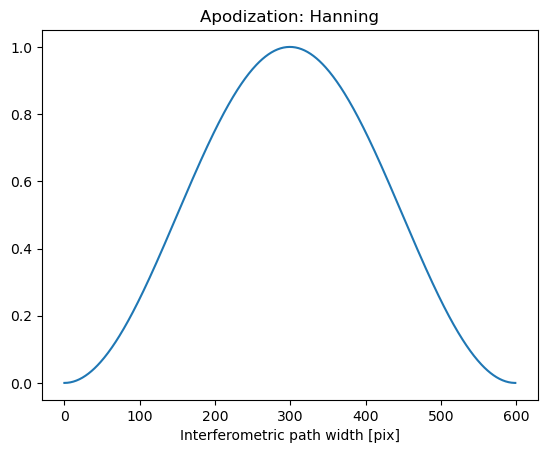

In [41]:
import numpy as np
import matplotlib.pyplot as plt

detector_width = 600
apod = np.hanning(detector_width)


x = np.linspace(0, 1, detector_width)
plt.plot(apod)

plt.xlabel('Interferometric path width [pix]')
plt.title('Apodization: Hanning')
plt.show()



